In [19]:
import numpy as np
import pandas as pd

In [20]:
red_wine_file_path=r'T:\TOSHITH\PROGRAMMING\Wine-Quality-Classification-using-ML\winequality-red.csv'
white_wine_file_path=r'T:\TOSHITH\PROGRAMMING\Wine-Quality-Classification-using-ML\winequality-white.csv'
red_wine_df=pd.read_csv(red_wine_file_path,sep=';')
white_wine_df=pd.read_csv(white_wine_file_path,sep=';')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def return_train_and_test(balanced_df, split_ratio, red_wine_df):
    # Make a copy to avoid modifying original
    balanced_df = balanced_df.copy()

    # Step 1: Create 'colour' column based on index origin
    colour_column = balanced_df.apply(
        lambda row: 0 if row.name in red_wine_df.index else 1, axis=1
    )
    balanced_df['colour'] = colour_column

    # Step 2: Split into features and target
    X = balanced_df.drop(columns=['quality'])
    Y = balanced_df['quality']

    # Step 3: Train-test split with stratification
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=split_ratio, random_state=42, stratify=Y
    )

    # Step 4: Identify columns to scale (exclude 'colour')
    columns_to_scale = X_train.select_dtypes(include=['float64', 'int64']).columns
    columns_to_scale = [col for col in columns_to_scale if col != 'colour']

    # Step 5: Apply scaling
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
    X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

    return X_train_scaled, X_test_scaled, Y_train, Y_test

### Removing outliers and doing under sampling 

In [ ]:
print(red_wine_df['quality'].value_counts(),white_wine_df['quality'].value_counts())

unwanted_qualities = [9,3,8] # why bother putting this record even 

# Filter out those rows from red and white wine data
red_wine_df = red_wine_df[~red_wine_df['quality'].isin(unwanted_qualities)]
white_wine_df = white_wine_df[~white_wine_df['quality'].isin(unwanted_qualities)]

'''print(red_wine_df.shape,white_wine_df.shape)
print(red_wine_df['quality'].value_counts(),white_wine_df['quality'].value_counts())'''


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64 quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


"print(red_wine_df.shape,white_wine_df.shape)\nprint(red_wine_df['quality'].value_counts(),white_wine_df['quality'].value_counts())"

In [ ]:
# Get list of common quality levels
common_qualities = sorted(set(red_wine_df['quality']) & set(white_wine_df['quality']))

# Get min count per quality across both red & white wines
min_counts = {}
for q in common_qualities:
    red_count = (red_wine_df['quality'] == q).sum()
    white_count = (white_wine_df['quality'] == q).sum()
    min_counts[q] = min(red_count, white_count)

# Sample equal records per quality from each dataset
balanced_red = []
balanced_white = []

for q in common_qualities:
    red_sample = red_wine_df[red_wine_df['quality'] == q].sample(n=min_counts[q], random_state=42)
    white_sample = white_wine_df[white_wine_df['quality'] == q].sample(n=min_counts[q], random_state=42)
    
    balanced_red.append(red_sample)
    balanced_white.append(white_sample)

# Concatenate all samples
method_1 = pd.concat(balanced_red + balanced_white, ignore_index=True)

print("Balanced Dataset Shape:", method_1.shape)
print("Quality distribution:\n", method_1['quality'].value_counts().sort_index())

Balanced Dataset Shape: (3142, 12)
Quality distribution:
 quality
4     106
5    1362
6    1276
7     398
Name: count, dtype: int64


In [ ]:
# Get list of common quality levels
common_qualities = sorted(set(red_wine_df['quality']) & set(white_wine_df['quality']))

# Determine the minimum number of samples available for each quality (across red and white separately)
min_per_quality = {}
for q in common_qualities:
    red_q = red_wine_df[red_wine_df['quality'] == q]
    white_q = white_wine_df[white_wine_df['quality'] == q]
    min_per_quality[q] = min(len(red_q), len(white_q))

# Find the smallest of these to ensure equal count for every quality
global_min = min(min_per_quality.values())

# Sample exactly global_min from red and white for each quality
balanced_samples = []

for q in common_qualities:
    red_sample = red_wine_df[red_wine_df['quality'] == q].sample(n=global_min, random_state=42)
    white_sample = white_wine_df[white_wine_df['quality'] == q].sample(n=global_min, random_state=42)
    
    red_sample['colour'] = 0
    white_sample['colour'] = 1
    
    balanced_samples.extend([red_sample, white_sample])

# Combine all into one master balanced dataset
method_2 = pd.concat(balanced_samples, ignore_index=True)

print("Final balanced dataset shape:", method_2.shape)
print("Per-quality count:\n", method_2['quality'].value_counts().sort_index())

Final balanced dataset shape: (424, 13)
Per-quality count:
 quality
4    106
5    106
6    106
7    106
Name: count, dtype: int64


### data set for binary classification 

In [ ]:
# Step 1: Encode quality as binary
def label_quality(q):
    return 1 if q >= 6 else 0  # 1 = good, 0 = bad

red_wine_df['quality'] = red_wine_df['quality'].apply(label_quality)
white_wine_df['quality'] = white_wine_df['quality'].apply(label_quality)

# Step 2: Add colour column
red_wine_df['colour'] = 0  # red = 0
white_wine_df['colour'] = 1  # white = 1

# Step 3: Create N_balanced_df (just combined)
method_3 = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

# Step 4: Create D_balanced_df (equal number of red and white samples)
min_len = min(len(red_wine_df), len(white_wine_df))

red_downsampled = red_wine_df.sample(n=min_len, random_state=42)
white_downsampled = white_wine_df.sample(n=min_len, random_state=42)

method_4 = pd.concat([red_downsampled, white_downsampled], ignore_index=True)

# ✅ Optional: Check dataset shapes and distribution
print("N_balanced_df shape:", method_3.shape)
print("D_balanced_df shape:", method_4.shape)
print("\nN_balanced_df quality value counts:\n", method_3['quality'].value_counts())
print("\nD_balanced_df wine type value counts:\n", method_4['colour'].value_counts())

N_balanced_df shape: (6497, 13)
D_balanced_df shape: (3198, 13)

N_balanced_df quality value counts:
 quality
1    4113
0    2384
Name: count, dtype: int64

D_balanced_df wine type value counts:
 colour
0    1599
1    1599
Name: count, dtype: int64


Run the cell according to the method of sampling you wish to do 

Method 1

In [ ]:
SPLIT_RATIO=0.3 #FOR 70:30 TRAIN TEST SPLIT
X_train, X_test, Y_train, Y_test = return_train_and_test(method_1,SPLIT_RATIO,red_wine_df)

Method 2

In [ ]:
SPLIT_RATIO=0.3 #FOR 70:30 TRAIN TEST SPLIT
X_train, X_test, Y_train, Y_test = return_train_and_test(method_2,SPLIT_RATIO,red_wine_df)

Method 3

In [ ]:
SPLIT_RATIO=0.3 #FOR 70:30 TRAIN TEST SPLIT
X_train, X_test, Y_train, Y_test = return_train_and_test(method_3,SPLIT_RATIO,red_wine_df)

Method 4

In [ ]:
SPLIT_RATIO=0.3 #FOR 70:30 TRAIN TEST SPLIT
X_train, X_test, Y_train, Y_test = return_train_and_test(method_4,SPLIT_RATIO,red_wine_df)

### ANN for classification

In [34]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [35]:
# One-hot encode target labels
Y_train_encoded = to_categorical(Y_train)
Y_test_encoded = to_categorical(Y_test)

# Define input shape
input_dim = X_train.shape[1]
num_classes = Y_train_encoded.shape[1]

# Define early stopping
early_stop = EarlyStopping(
    monitor='val_loss',       # Stop when validation loss stops improving
    patience=15,               # Allow 5 epochs of no improvement
    restore_best_weights=True # Restore best model weights after stopping
)

# Build a deeper ANN with BatchNorm and Dropout
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train with early stopping
history = model.fit(X_train, Y_train_encoded,
                    validation_data=(X_test, Y_test_encoded),
                    epochs=300,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/300


c:\Users\toshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5539 - loss: 0.9153 - val_accuracy: 0.7146 - val_loss: 0.5996
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6387 - loss: 0.6711 - val_accuracy: 0.7156 - val_loss: 0.5753
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6879 - loss: 0.6132 - val_accuracy: 0.7125 - val_loss: 0.5538
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7134 - loss: 0.5506 - val_accuracy: 0.7323 - val_loss: 0.5397
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7344 - loss: 0.5592 - val_accuracy: 0.7469 - val_loss: 0.5231
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7012 - loss: 0.5610 - val_accuracy: 0.7573 - val_loss: 0.5141
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7281 - loss: 0.5411 - val_accuracy: 0.7552 - val_loss: 0.5128
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7281 - loss: 0.5386 - val_accuracy: 0.7625 - val_loss: 0.5

In [36]:
loss, accuracy = model.evaluate(X_test, Y_test_encoded)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Predict class probabilities
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Print classification report
print(classification_report(Y_test, y_pred_classes))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.7670 - loss: 0.4859

Test Accuracy: 0.7594
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       378
           1       0.78      0.83      0.81       582

    accuracy                           0.76       960
   macro avg       0.75      0.74      0.74       960
weighted avg       0.76      0.76      0.76       960



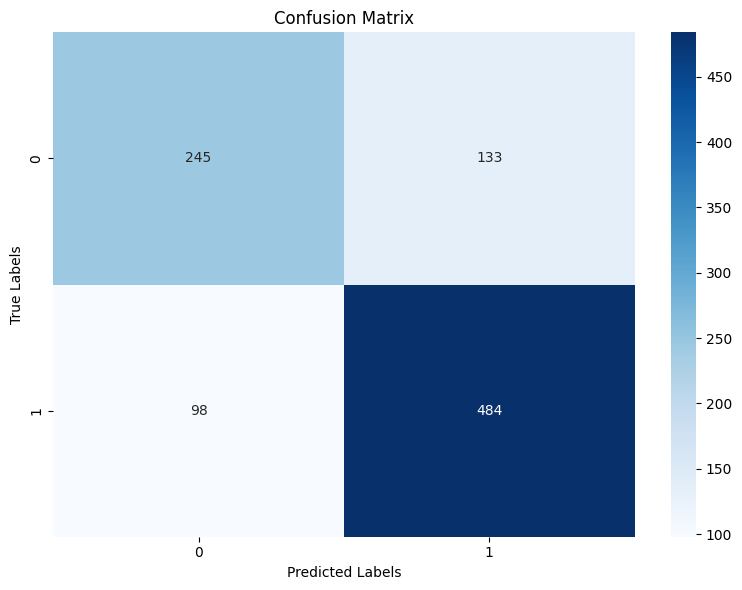

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Get class labels
class_labels = sorted(Y_test.unique()) if hasattr(Y_test, 'unique') else sorted(set(Y_test))

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

### Random Forest for classification

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       378
           1       0.81      0.84      0.83       582

    accuracy                           0.79       960
   macro avg       0.78      0.77      0.77       960
weighted avg       0.78      0.79      0.78       960



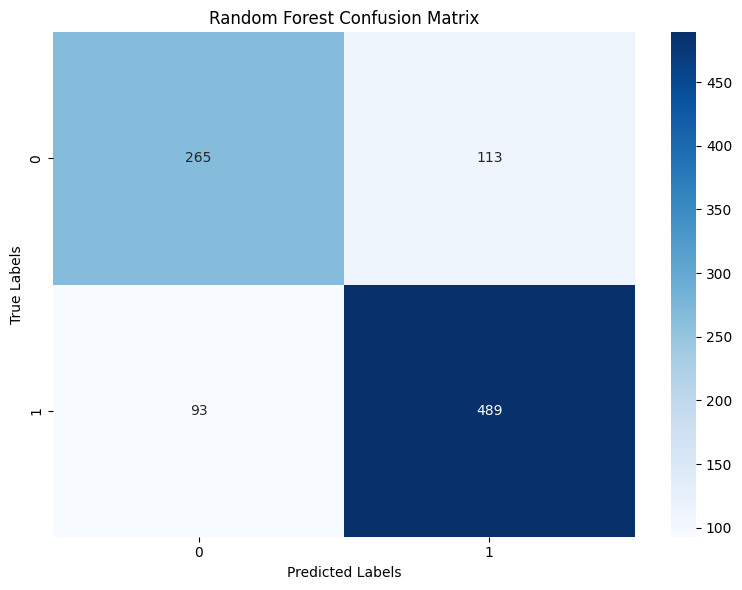

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)
Y_test_encoded = le.transform(Y_test)

# Step 2: Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Step 3: RandomizedSearchCV with class weighting
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Step 4: Fit model
random_search.fit(X_train, Y_train_encoded)
best_rf = random_search.best_estimator_

# Step 5: Predict and decode
y_pred_encoded = best_rf.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

# Step 6: Evaluation
print("\nBest Parameters:", random_search.best_params_)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
class_labels = sorted(Y_test.unique()) if hasattr(Y_test, 'unique') else sorted(set(Y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


### XGBOOST for classification

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\toshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       378
           1       0.82      0.82      0.82       582

    accuracy                           0.78       960
   macro avg       0.77      0.77      0.77       960
weighted avg       0.78      0.78      0.78       960



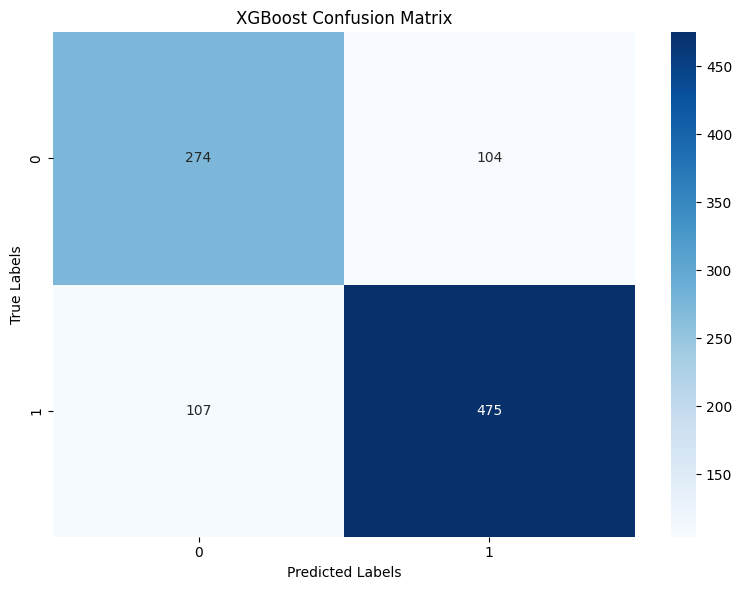

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)
Y_test_encoded = le.transform(Y_test)

# Step 2: Compute sample weights for class balancing
sample_weights = compute_sample_weight(class_weight='balanced', y=Y_train_encoded)

# Step 3: Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 2, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.1, 0.5, 1]
}

# Step 4: Set up base model
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Step 5: Perform randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_weighted',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Step 6: Fit with sample weights
random_search.fit(X_train, Y_train_encoded, sample_weight=sample_weights)
best_xgb = random_search.best_estimator_

# Step 7: Predict and decode
y_pred_encoded = best_xgb.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

# Step 8: Evaluation
print("\nBest Parameters:", random_search.best_params_)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
class_labels = sorted(Y_test.unique()) if hasattr(Y_test, 'unique') else sorted(set(Y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()
